# Hash functions and multiplanes

## Basic Hash tables

In [1]:
import numpy as np
import pprint
from utils_nb import plot_vectors
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=4) # Instantiate a pretty printer

In the next cell, we will define a straightforward hash function for integer numbers. The function will produce a hash table stored as a dictionary, where keys contain the hash keys, and the values will provide the hashed elements of the input list. 

The hash function is just the remainder of the integer division between each element and the desired number of buckets.

In [2]:
def basic_hash_table(value_l, n_buckets):
    
    def hash_function(value, n_buckets):
        return int(value) % n_buckets
    
    hash_table = {i:[] for i in range(n_buckets)}
    
    for value in value_l:
        hash_value = hash_function(value, n_buckets)
        hash_table[hash_value].append(value)
        
    return hash_table

Now let's see the hash table function in action. The pretty print function (`pprint()`) will produce a visually appealing output.

In [3]:
value_l = [100, 10, 14, 17, 97]
hash_table_example = basic_hash_table(value_l, n_buckets=10)
pp.pprint(hash_table_example)

{   0: [100, 10],
    1: [],
    2: [],
    3: [],
    4: [14],
    5: [],
    6: [],
    7: [17, 97],
    8: [],
    9: []}


## Planes

Multiplanes hash functions are other types of hash functions. Multiplanes hash functions are based on the idea of numbering every single region that is formed by the intersection of n planes. In the follwoing code, we show the most basic forms of the multiplane principle. First, with a single plane:

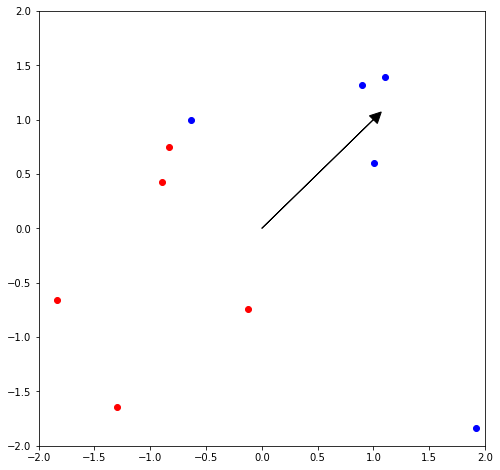

In [10]:
P = np.array([[1, 1]]) # define a sinlge plane
fig, ax1 = plt.subplots(figsize=(8,8)) # Create a plot

plot_vectors([P], axes=[2, 2], ax=ax1) # Plot the plane P as a vector

# Plot random points:
for i in range(0, 10):
    v1 = np.array(np.random.uniform(-2, 2, 2)) # Get a pair of random numbers between -4 and 4
    side_of_plane = np.sign(np.dot(P, v1.T))
    
    # Color the points depending on the sign of the result of np.dot(P, point.T)
    if side_of_plane == 1:
        ax1.plot([v1[0]], [v1[1]], 'bo') # Plot blue points
    else:
        ax1.plot([v1[0]], [v1[1]], 'ro') # Plot red points
        
plt.show()

The first thing to note is that the vector that defines the plane does not mark the boundary between the two sides of the plane. It marks the direction in which you find the 'positive' side of the plane.

If we want to plot the separation plane, we need to plot a line that is perperndicular to our vector `P`. We can get such a line using a $90^o$ rotation matrix.

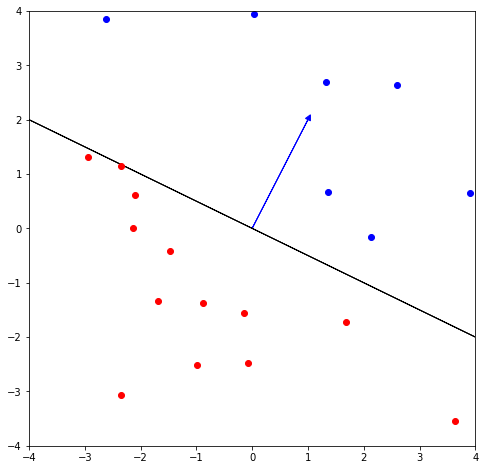

In [16]:
P = np.array([[1, 2]]) # Define a single plane. 

# Get a new plane perpendicular to P. We use the rotation matrix
PT = np.dot([[0, 1], [-1, 0]], P.T).T

fig, ax1 = plt.subplots(figsize=(8,8)) # Create a plot with custom size

plot_vectors([P], colors=['b'], axes=[2, 2], ax=ax1) # Plot the plane as a vector

# Plot the plane P as 2 vectors
# We scale by 2 just to get the arroes outside the current box
plot_vectors([PT * 4, PT * -4], colors = ['k', 'k'], axes=[4,4], ax=ax1)

# Plot 20 random points:
for i in range(0, 20):
    v1 = np.array(np.random.uniform(-4, 4, 2)) # Get a pair of random numbers between -4 and 4
    side_of_plane = np.sign(np.dot(P, v1.T)) # Get the sign of the dot product with P
    # Color the points depending on the sign of the result of np.dot(P, point.T)
    if side_of_plane == 1:
        ax1.plot([v1[0]], [v1[1]], 'bo') # Plot the blue point
    else:
        ax1.plot([v1[0]], [v1[1]], 'ro') # Plot a red point
        
plt.show()


Now, let us see what is inside the code that color the points.

In [18]:
P = np.array([[1, 1]])
v1 = np.array([[1, 2]])
v2 = np.array([[-1, 1]])
v3 = np.array([[-2, -1]])

In [19]:
np.dot(P, v1.T)

array([[3]])

In [20]:
np.dot(P, v2.T)

array([[0]])

In [22]:
np.dot(P, v3.T)

array([[-3]])

The function below checks in which side of the plane P is located the vector `v`

In [23]:
def side_of_plane(P, v):
    dotproduct = np.dot(P, v.T) # Get the dot product P * v
    sign_of_dot_product = np.sign(dotproduct) # The sign  of the elements of the dotproduct matrix
    sign_of_dot_product_scalar = sign_of_dot_product.item() # The value of the first item
    return sign_of_dot_product_scalar

In [24]:
side_of_plane(P, v1)

1

In [25]:
side_of_plane(P, v2)

0

In [26]:
side_of_plane(P, v3)

-1

## Hash Function with multiple planes

In the following section, we are going to define a hash function with a list of three custom planes in 2D.

In [28]:
P1 = np.array([[1, 1]]) # First plane 2D
P2 = np.array([[-1, 1]]) # Second plane 2D
P3 = np.array([[-1, -1]]) # Third plane 2D
P_l = [P1, P2, P3] # List of arrays. It is the multi plane

# Vector to search
v = np.array([[2, 2]])

The next function creates a hash value based on a set of planes. The output value is a combination of the side of the plane where the vector is localized with respect to te collection of planes.

We can think of this list of planes as a set of basic hash functions, each of which produce only 1 or 0 output.

In [29]:
def hash_multi_plane(P_l, v):
    hash_value = 0
    for i, P in enumerate(P_l):
        sign = side_of_plane(P, v)
        hash_i = 1 if sign >= 0 else 0
        hash_value +=2**i * hash_i
    return hash_value

In [31]:
hash_multi_plane(P_l, v) # Find the number of the plane that contains this value

3

## Random Planes

In the cell bellow, we create a set of three random planes

In [32]:
np.random.seed(0)
num_dimensions = 2 # is 300 in assignment
num_planes = 3 # is 10 in assignment
random_planes_matrix = np.random.normal(
                       size=(num_planes, num_dimensions))
print(random_planes_matrix)

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]]


In [33]:
v = np.array([[2, 2]])

The next function is similar to the `side_of_plane()` function, but it evaluates more than a plane each time. The result is an array with the side of plane of `v`, for the set of planes `P`

In [35]:
# Side of the plane function. The result is a matrix
def side_of_plane_matrix(P, v):
    dotproduct = np.dot(P, v.T)
    sign_of_dot_product = np.sign(dotproduct) # Get a boolean value telling if the value in the cell is positive or negative
    return sign_of_dot_product

Get the side of the plane of the vector `[2, 2]` for the set of random planes.

In [36]:
sides_l = side_of_plane_matrix(random_planes_matrix, v)

sides_l

array([[1.],
       [1.],
       [1.]])

Now, let us define the former function to define our multiple hash function

In [37]:
def hash_multi_plane_matrix(P, v, num_planes):
    sides_matrix = side_of_plane_matrix(P, v) # Get the side of planes for P and v
    hash_value = 0
    for i in range(num_planes):
        sign = sides_matrix[i].item() # Get the value inside the matrix cell
        hash_i = 1 if sign >= 0 else 0
        hash_value += 2**i * hash_i 

    return hash_value

Print the bucket hash for the vector `v = [2, 2]`.

In [38]:
hash_multi_plane_matrix(random_planes_matrix, v, num_planes)

7

## Document vectors

Before we finish this lab, remember that you can represent a document as a vector by adding up the word vectors for the words inside the document. In this example, our embedding contains only three words, each represented by a 3D array.

In [39]:
word_embedding = {"I": np.array([1, 0, 1]),
                  "love": np.array([-1, 0, 1]),
                  "learning": np.array([1,0,1])
                 }
words_in_document  = ['I', 'love', 'learning', 'not_a_word']
document_embeding = np.array([0,0,0])
for word in words_in_document:
    document_embeding += word_embedding.get(word, 0)
    
print(document_embeding)

[1 0 3]
